In [21]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
#Importing Boston Dataset
from sklearn.datasets import load_boston

In [23]:
#Loading Boston Dataset and Analysing
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [24]:
#Biston Dataset Discription
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
#Exploring and analysing raw data from dataset
X, y = load_boston(return_X_y = True)
df = pd.DataFrame(X,columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


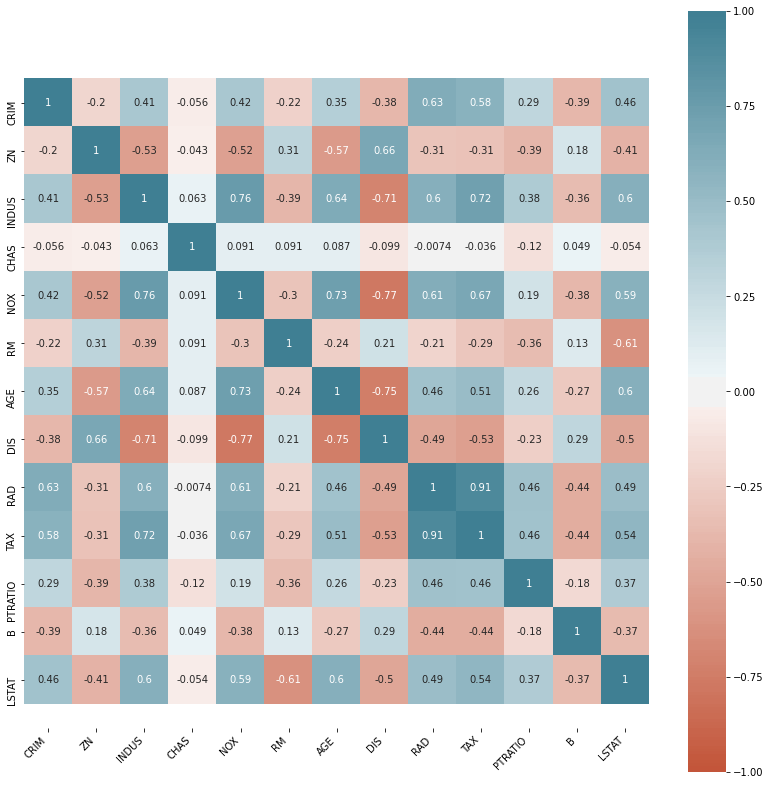

In [28]:
# Analysing correlation of the features using heatmap
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

<AxesSubplot:xlabel='INDUS'>

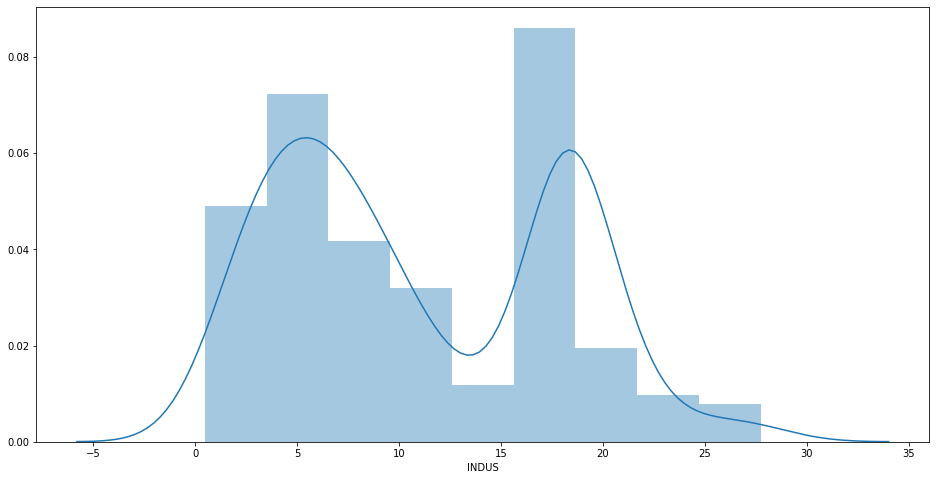

In [47]:
#Estimate Density of INDUS Feature
plt.figure(figsize = (16,8))
sns.distplot(df["INDUS"])

In [38]:
#Preprocessing for regression.
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [39]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

91

In [40]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
411,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
412,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
413,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [41]:
y_new = y[list(new_df["index"])]
len(y_new)

415

In [52]:
X_new = new_df.drop('index', axis = 1)

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X_new)
X_scaled

array([[0.00000000e+00, 2.25000000e-01, 6.78152493e-02, ...,
        3.13953488e-01, 1.00000000e+00, 1.07402512e-01],
       [7.32648551e-04, 0.00000000e+00, 2.42302053e-01, ...,
        6.04651163e-01, 1.00000000e+00, 2.44877726e-01],
       [7.31950458e-04, 0.00000000e+00, 2.42302053e-01, ...,
        6.04651163e-01, 9.87015473e-01, 7.60079313e-02],
       ...,
       [1.90020901e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.76744186e-01, 1.00000000e+00, 1.29213483e-01],
       [3.60460295e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.76744186e-01, 9.88993460e-01, 1.56972902e-01],
       [1.43423197e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.76744186e-01, 1.00000000e+00, 2.03238599e-01]])

In [54]:
from sklearn import preprocessing

X = df.drop(['INDUS'], axis = 1)
y = df[['INDUS']]

X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns)

y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s, columns = y.columns)

X_s

,CRIM,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [55]:
#Splitting the dataset into train and test test.
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(290, 13)
(125, 13)
(290,)
(125,)


In [56]:
#Linear Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(f'Regression model coef: {regression_model.coef_}')

Regression model coef: [-4.69497298e+00  8.13333751e-01  3.79712166e-01 -4.44089210e-15
 -6.29335122e+00  1.86661692e+01 -2.59455308e+00 -1.09333760e+01
  5.83630624e+00 -6.31057058e+00 -7.84728597e+00  1.47854588e+00
 -1.32637783e+01]


In [57]:
#Ridge Model
ridge_model = Ridge(alpha = 0.00)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [-4.69497298e+00  8.13333751e-01  3.79712166e-01 -5.35664249e-15
 -6.29335122e+00  1.86661692e+01 -2.59455308e+00 -1.09333760e+01
  5.83630624e+00 -6.31057058e+00 -7.84728597e+00  1.47854588e+00
 -1.32637783e+01]


In [58]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [ -4.6780443    0.8089309    0.36332181   0.          -6.26355135
  18.6420164   -2.58961679 -10.90532486   5.81176544  -6.28849044
  -7.84193517   1.48327349 -13.27166376]


In [59]:
ridge_model = Ridge(alpha = 0.02)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [ -4.66132054   0.80458069   0.34707729   0.          -6.23406396
  18.6179823   -2.58472017 -10.87748323   5.7874625   -6.26662805
  -7.83662943   1.48794563 -13.27935426]


In [60]:
ridge_model = Ridge(alpha = 0.04)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [ -4.62847351   0.79603516   0.31501773   0.          -6.17600769
  18.57026495  -2.57504402 -10.82241676   5.73955529  -6.22354364
  -7.82614992   1.4971268  -13.29416334]


In [61]:
ridge_model = Ridge(alpha = 0.08)
ridge_model.fit(X_train, y_train)

print(f'Ridge model coef: {ridge_model.coef_}')

Ridge model coef: [ -4.5650858    0.77954304   0.25256254   0.          -6.06344148
  18.47619842  -2.55614678 -10.71467251   5.64643518  -6.13984999
  -7.80569744   1.51485861 -13.32158114]


In [62]:
#Lasso Model
lasso_model = Lasso(alpha = 0.005)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [ -4.04824491   0.56115973   0.           0.          -5.7124024
  18.62076899  -2.46187651 -10.30739633   5.08460502  -5.67188755
  -7.70330593   1.38582471 -13.4691968 ]


In [63]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [ -3.36413343   0.32387141  -0.           0.          -5.27232073
  18.61535038  -2.32761504  -9.61847066   4.41934582  -5.22618498
  -7.61434025   1.29906863 -13.70292742]


In [64]:
lasso_model = Lasso(alpha = 0.02)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [ -2.02739262   0.          -0.           0.          -4.36877445
  18.57412441  -2.04396114  -8.3189178    3.10767169  -4.37239748
  -7.38322844   1.12574687 -14.18061439]


In [65]:
lasso_model = Lasso(alpha = 0.04)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [ -0.           0.          -0.02825535   0.          -2.48515997
  18.36159694  -1.43835338  -6.11313701   0.76058974  -2.84138274
  -6.71043378   0.75570491 -15.05020778]


In [66]:
lasso_model = Lasso(alpha = 0.08)
lasso_model.fit(X_train, y_train)

print(f'Lasso model coef: {lasso_model.coef_}')

Lasso model coef: [ -0.           0.          -0.           0.          -0.
  17.26529852  -0.12741994  -2.42916292   0.          -2.11434641
  -5.97413659   0.         -15.86386082]


In [67]:
#Comparison and Choosing the best performing model.
#Simple Linear Regression
print("Train: ", regression_model.score(X_train, y_train))
print("Test: ", regression_model.score(X_test, y_test))
print()

#Ridge Regression
print("Ridge Train: ", ridge_model.score(X_train, y_train))
print("Ridge Test: ", ridge_model.score(X_test, y_test))
print()

#Lasso Regression
print("Lasso Train: ", lasso_model.score(X_train, y_train))
print("Lasso Test: ", lasso_model.score(X_test, y_test))

Train:  0.7632762978466843
Test:  0.6812794150754076

Ridge Train:  0.7632383883335823
Ridge Test:  0.6811611387117382

Lasso Train:  0.7329770443643415
Lasso Test:  0.6548581933559308


<b>Final Evaluation </b> : For this dataset, Linear Regression is almost equal to Ridge Regression but 
Ridge Regression is better than Lasso Regression.
